## Logistic Regression

**Logistic Regression** is a statistical model used to predict the class (dependent variable) when a set of features (independent variables) are given. It's used for binary classification (only 2 classes) problems.

<br>
**Logistic Function:**

>  Logistic Regression is named after a function called Logistic function, also called sigmoid function.  
It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1.
$$f(x) = \frac{1}{1 + \exp^{-x}}$$
where exp is the base of natural logarithm and x is any real valued number.

<br>
**Logistic Regression function representation:**

>  Logistic Regression is represented using an equation in which input values are combined linearly using co-efficients and then they are passed to logistic function to predict the output value (between 0 and 1). This output is then rounded to 0 or 1 based on threshhold value. The equation will be of the form:
$$y = \frac {1} {1 + \exp ^{-(\beta_0 + \beta_1 . x_1 + \beta_2 . x_2 + ...)}}$$
where $x_1, x_2, x_3, ...$ are the features (independent variables) and $\beta_0, \beta_1, \beta_2, ...$ are the co-efficients.
In mathematical terms Logistic Regression predicts the probability of default class (let's call it success class. ie, y=1)
$$y=P(X)=P(y=1|X)$$
Now, if we take log of odds of the default class we can see the linear combination of input features.
$$\ln(P(X) / 1-P(X)) = \beta_0 + \beta_1.x_1 + \beta_2.x_2 + ...$$
odds is the ratio of the probability of the event divided by the probability of not the event. In the equation the odds are log transformed, we call this left hand side the log-odds or the probit.

<br>
**Learning the model:**

>* In order to form the model we have to get the co-efficients $\beta_0, \beta_1, \beta_2, ...$ from the training data. It can be done using maximum-likelihood estimation.
* The best coefficients would result in a model that would predict a value very close to 1 for the default class and a value very close to 0 for the other class. The intuition for maximum-likelihood for logistic regression is that a search procedure seeks values for the coefficients that minimize the error in the probabilities predicted by the model to those in the data.
* Minimization algorithm is used to optimize the best values for the coefficients for your training data, which is done using using efficient numerical optimization algorithm.

<br>
**Assumptions of the model:**

>* The dependent variable should be dichotomous in nature (e.g., presence vs. absent).
* There should be no outliers in the data, which can be assessed by converting the continuous predictors to standardized scores, and removing values below -3.29 or greater than 3.29.
* There should be no high correlations (multicollinearity) among the predictors.  This can be assessed by a correlation matrix among the predictors. Tabachnick and Fidell (2013) suggest that as long correlation coefficients among independent variables are less than 0.90 the assumption is met.

<br>
<br>
**Important factors:**  
>1. Adding more number of independent variables or taking non-related feature into consideration will result in overfitting.
2. How signifcant is the regression line to make predictions with highest possible accuracy ? --> use r-square and log loss.
$$log\_loss = -\sum y*\ln(f(x)) + (1 - y)*\ln(1 - f(x))$$

## Use case implementation of Logistic Regression##

We will build a model to predict the survival of RMS Titanic passengers given a set of features like name, sex, age, ticket, cabin, etc.

Let's get started...

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the data
data = pd.read_csv('titanic_dataset.csv')

print(data.shape)

(891, 12)


In [3]:
# explore the dataset --> 1 = Survived, 0 = Not survived
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# this will display details for int and float types only
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# check for any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# print number and percentage of missing data for each columns
total = data.isnull().sum().sort_values(ascending=False)
percent = data.isnull().sum() / data.isnull().count() * 100
percent = (round(percent, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['missing', 'missing %'])
missing_data.head()

,missing,missing %
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [7]:
# columns in dataframe
print(data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
# lets remove some columns as they won't give us any information
data = data.drop(['PassengerId', 'Name', 'Cabin'], axis=1)
print(data.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')


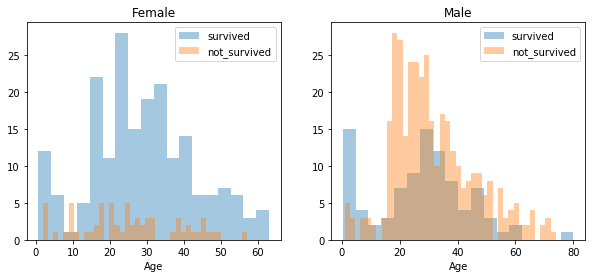

In [9]:
# plot men and women survival data wrt age
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['Sex']=='female']
men = data[data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

In [10]:
# lets fill the missing age values with random probable values
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
# fill NaN values in Age column with random values generated
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data["Age"] = age_slice
data["Age"] = data["Age"].astype(int)

data["Age"].isnull().sum()

0

In [11]:
# explore Embarked values
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [12]:
# fill missing value with common values
common_value = 'S'
data['Embarked'] = data['Embarked'].fillna(common_value)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 59.2+ KB


In [14]:
# convert to numeric
genders = {"male": 0, "female": 1}
ports = {"S": 0, "C": 1, "Q": 2}

data['Sex'] = data['Sex'].map(genders)
data['Embarked'] = data['Embarked'].map(ports)

In [15]:
# explore Ticket values
data['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [16]:
# 681 unique values, so we will drop it
data = data.drop(['Ticket'], axis=1)

In [17]:
# classify age to groups
data['Age'] = data['Age'].astype(int)
data.loc[data['Age'] <= 11, 'Age'] = 0
data.loc[(data['Age'] > 11) & (data['Age'] <= 18), 'Age'] = 1
data.loc[(data['Age'] > 18) & (data['Age'] <= 22), 'Age'] = 2
data.loc[(data['Age'] > 22) & (data['Age'] <= 27), 'Age'] = 3
data.loc[(data['Age'] > 27) & (data['Age'] <= 33), 'Age'] = 4
data.loc[(data['Age'] > 33) & (data['Age'] <= 40), 'Age'] = 5
data.loc[(data['Age'] > 40) & (data['Age'] <= 66), 'Age'] = 6
data.loc[ data['Age'] > 66, 'Age'] = 6

# let's see how it's distributed 
data['Age'].value_counts()

6    167
4    164
5    154
3    129
2    115
1     94
0     68
Name: Age, dtype: int64

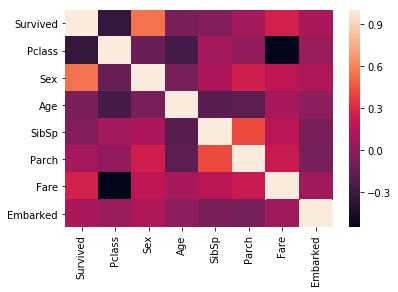

In [18]:
# plot heatmap
sns.heatmap(data.corr())

In [19]:
# split features and labels
features = data.drop('Survived', axis=1)
labels = data['Survived']

In [20]:
# get train and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=46)

print('x_train shape :', x_train.shape)
print('x_test shape :', x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

x_train shape : (712, 7)
x_test shape : (179, 7)
y_train shape : (712,)
y_test shape : (179,)


In [21]:
# train model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Accuracy: 0.821229050279
             precision    recall  f1-score   support

          0       0.82      0.89      0.85       104
          1       0.83      0.72      0.77        75

avg / total       0.82      0.82      0.82       179

Confusion Matrix:



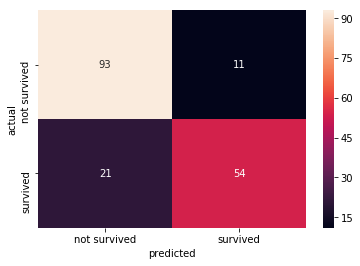

In [22]:
# evaluate model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

predictions = model.predict(x_test)

print('Accuracy:', accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
conf_matrix = pd.DataFrame(confusion_matrix(y_test, predictions),
                           index=['not survived', 'survived'],
                           columns=['not survived', 'survived'])
print('Confusion Matrix:\n')
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()